## Advanced Lane Finding Project

The goals / steps of this project are the following:

* Rubric 1: Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Rubric 2-1: Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

# Parameters:

# Sobel
* sobel_kernel_size = 9

* dir_thresh  = (0.7, 1.2)

* sx_thresh = (20, 100)

* sy_thresh = (65, 150)

* mag_thresh = (170, 255)

# Bird eye view:

* * src_leftlowerpoint  = [260,680]

* * src_leftupperpoint  = [568,470]

* * src_rightlowerpoint = [1043,680]

* * src_rightupperpoint = [717,470]


* * dst_leftlowerpoint  = [260,680]

* * dst_leftupperpoint  = [200,0]

* * dst_rightlowerpoint = [1000,680]

* * dst_rightupperpoint = [1000,0]


# Line fitting:

* n_windows = 10  # 10

* margin = 100   # Determines how wide the window is

* minpix = 40    # Set minimum number of pixels found to recenter window


In [40]:
# Parameters:
import numpy as np

# Sobel
sobel_kernel_size = 9
dir_thresh  = (0.7, 1.2)
sx_thresh = (20, 100)
sy_thresh = (65, 150)
mag_thresh = (170, 255)

# Bird eye view:
src_leftlowerpoint  = [260,680]
src_leftupperpoint  = [568,470]
src_rightlowerpoint = [1043,680]
src_rightupperpoint = [717,470]

dst_leftlowerpoint  = [260,680]
dst_leftupperpoint  = [200,0]
dst_rightlowerpoint = [1000,680]
dst_rightupperpoint = [1000, 0]

src = np.float32([src_leftlowerpoint, src_leftupperpoint, src_rightlowerpoint, src_rightupperpoint])
dst = np.float32([dst_leftlowerpoint, dst_leftupperpoint, dst_rightlowerpoint, dst_rightupperpoint])

# Line fitting:
n_windows = 10
margin = 100   # Determines how wide the window is
minpix = 40    # Set minimum number of pixels found to recenter window

In [41]:
import cv2
import glob

import matplotlib
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
from IPython import display
from random import randint
from skimage import img_as_ubyte
import pickle

%matplotlib inline

In [42]:
# Utility function:
import os

# display 2 images and save with a different name in the given directory. Create directory  if not exist
def display_save_2_images(display_flage, images, titles, image_file_full_name, file_prefix="", file_suffix="", output_directory='./output_images/'):
    if (display_flage == 1):
        plt.figure(figsize=(8, 4))
        plt.subplot(1, 2, 1)
        plt.title(titles[0])
        plt.axis('off')
        plt.imshow(images[0], cmap='binary')
        plt.subplot(1, 2, 2)
        plt.title(titles[1])
        plt.axis('off')
        plt.imshow(images[1], cmap='binary')
        plt.tight_layout(pad=0.50)
        plt.tight_layout(pad=0.50)

        base=os.path.basename(image_file_full_name)
        (file_name,ext) = os.path.splitext(base)
        new_file_name = file_prefix + file_name + file_suffix + ext
        image_file_full_name_newdir = os.path.join(output_directory, new_file_name)

        print (image_file_full_name, new_file_name, image_file_full_name_newdir)
        if not os.path.exists(output_directory): #if output dir doesn't exists, create it
            os.makedirs(output_directory)

        plt.suptitle(new_file_name)
        plt.savefig(image_file_full_name_newdir)

        plt.show()
    return

In [43]:
def display_histogram(display_flage, hist):
    if display_flage == 1:
        plt.title('Lines histogram')
        plt.plot(hist)
        plt.savefig('./output_images/histogram.jpg')
    return

In [44]:
# Read Image
def readImage(imageFileName):
    img_rgb_cv2 = cv2.imread(imageFileName) # mpimg.imread(img_fname)
    img_bgr_mtplt = cv2.cvtColor(img_rgb_cv2, cv2.COLOR_RGB2BGR)
    return(img_rgb_cv2, img_bgr_mtplt)

In [45]:
# Save an image, not used. We use matplot save fig! otherwise too many format converstions.
def saveImage(imageFileName, image):
    cv2.imwrite(imageFileName, image)

# Rubric 1: Undestort: 

./camera_cal/calibration2.jpg Udestorted_calibration2.jpg ./output_images/Udestorted_calibration2.jpg


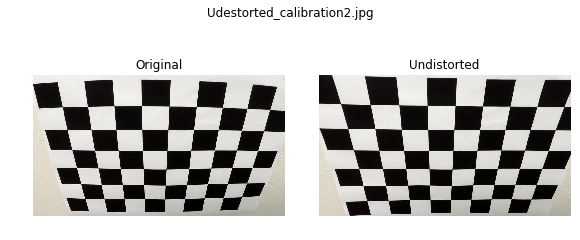

In [46]:
# Test calibration on a chessboard image. Store the result in the output folder
# load camera calibration param
# Note: This cell should be deleted when finding the proper parameters

dist_pickle = pickle.load( open( "./camera_calibration.p", "rb" ) ); mtx = dist_pickle["mtx"]; dist = dist_pickle["dist"]

image_name = './camera_cal/calibration2.jpg'
(image_rgb_cv2, image_bgr_mtplt) = readImage(image_name);    img = image_bgr_mtplt
img_undistorted = cv2.undistort(img, mtx, dist, None, mtx)
file_prefix = "Udestorted_"
file_extention = ""
outdir = './output_images/'
display_save_2_images(1, [img, img_undistorted], ['Original', 'Undistorted'], image_name, file_prefix, file_extention, './output_images/')

# Rubric 2: Pipeline

Pipeline is called after defining every function in the pipeline: The pipeline code is:
-     img = readImage(image_name)

-     img_undistorted = undistortImage(img)
    saveUndestortedImage(img_undistorted)
    binaryImage = createBinaryImage(img_undistorted)
    wrapedImages = wrapeImage(binaryImage)

In [47]:
# Rubric 2-0: Pre-Pipeline - Load camera parameters

In [48]:
# load camera calibration param
dist_pickle = pickle.load( open( "./camera_calibration.p", "rb" ) ); mtx = dist_pickle["mtx"]; dist = dist_pickle["dist"]

# Rubric 2-1: Pipeline - Distortion correction

In [49]:
# Undistort an image
def undistortImage(img):
    return (cv2.undistort(img, mtx, dist, None, mtx))

# Rubric 2-2: Pipeline - Color transforms

In [50]:
def colorConvert (img):
# Convert to HSV color space
    img = np.copy(img)
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HLS).astype(np.float)
    return hsv

# Rubric 2-3: Pipeline - Sobel x gradients and color thresholdeds binary image

In [51]:
def abs_sobel_thresh(img, orient='x', thresh_min=0, thresh_max=255):    
    if(orient=='x'):
        sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0)
        abs_sobelx = np.absolute(sobelx)
        scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    elif(orient=='y'):
        sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1)
        abs_sobely = np.absolute(sobely)
        scaled_sobel = np.uint8(255*abs_sobely/np.max(abs_sobely))
    binary_output = np.zeros_like(scaled_sobel)
    binary_output[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1
    return binary_output    

def mag_threshold(img, sobel_kernel=3, thresh=(0, 255)):      
    sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0)
    abs_sobelx = np.absolute(sobelx)
    sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1)
    abs_sobely = np.absolute(sobely)
    abs_sobel = np.sqrt(abs_sobelx*abs_sobelx+abs_sobely*abs_sobely)
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel)) # Scale to 8-bit (0 - 255) and convert to type = np.uint8
    binary_output = np.zeros_like(scaled_sobel) # Create a binary mask where mag thresholds are met
    binary_output[(scaled_sobel >= thresh[0]) & (scaled_sobel <= thresh[1])] = 1    
    return binary_output
    
def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    abs_sobelx = np.absolute(sobelx)
    sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    abs_sobely = np.absolute(sobely)
    dir_sobel = np.arctan2(abs_sobely, abs_sobelx) 
#    print (dir_sobel)
    binary_output = np.zeros_like(dir_sobel)
    binary_output[(dir_sobel >= thresh[0]) & (dir_sobel <= thresh[1])] = 1       
    return binary_output

def sobelBinaryHSVImage(hsv, sobel_kernel, mag_thresh, sx_thresh, sy_thresh, dir_thresh):
    # Use the S channel only, and Sobel x only
    channel = hsv[:,:,2] # s_channel
    
    gradx = abs_sobel_thresh(channel, orient='x', thresh_min=sx_thresh[0], thresh_max=sx_thresh[1])
    grady = abs_sobel_thresh(channel, orient='y', thresh_min=sy_thresh[0], thresh_max=sy_thresh[1])
    mag_binary = mag_threshold(channel, sobel_kernel=sobel_kernel_size, thresh=mag_thresh)
    dir_binary = dir_threshold(channel, sobel_kernel=sobel_kernel_size, thresh=dir_thresh)

    combined = np.zeros_like(dir_binary)
    combined[((gradx == 1) | (grady == 1)) & ((mag_binary == 1) | (dir_binary == 1))] = 1
    return combined

# Rubric 2-4: Pipeline - Bird eye view: fixed polygone. 

In [52]:
def birds_eye_view(img):
    global src, dst
    
    """ Apply perspective transformation on input image.
        Returns: The transformed input image (Bird's Eye) as uint8 type.
    """
    img_h = img.shape[0]
    img_w = img.shape[1]
    
    # Given src and dst points, calculate the perspective transform matrix
    M = cv2.getPerspectiveTransform(src, dst)

    # Warp the image using OpenCV warpPerspective()
    warped = cv2.warpPerspective(img, M, (img_w, img_h), flags=cv2.INTER_NEAREST)
    return img_as_ubyte(warped), M

# Rubric 2-5: Pipeline - Display the histogram

In [53]:
def get_histogram(img):
    histogram = np.sum(img[int(img.shape[0]/2):,:], axis=0)
    return histogram

# Rubric 2-6: Pipeline - fit 2 lanes

In [54]:
def fit_2_lanes(warped, histogram):
    global n_windows, margin, minpix
    out_img = np.dstack((warped, warped, warped))*255 # From binary to a display image to draw on and  visualize the result
        
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = np.int(histogram.shape[0]/2)
    left_x_base = np.argmax(histogram[:midpoint])
    right_x_base = np.argmax(histogram[midpoint:]) + midpoint

    win_height = np.int(warped.shape[0]/n_windows)
    # Find the non-zero x and y indices
    nonzero = warped.nonzero()
    nonzero_y = np.array(nonzero[0])
    nonzero_x = np.array(nonzero[1])
    left_x = left_x_base
    right_x = right_x_base

    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []
    # Step through the windows one by one
    for window in range(n_windows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = warped.shape[0] - (window+1)*win_height
        win_y_high = warped.shape[0] - window*win_height
        win_x_left_low = left_x - margin
        win_x_left_high = left_x + margin
        win_x_right_low = right_x - margin
        win_x_right_high = right_x + margin
        # Draw the windows on the visualization image
        cv2.rectangle(out_img,(win_x_left_low,win_y_low),(win_x_left_high,win_y_high),(0,255,0), 2) 
        cv2.rectangle(out_img,(win_x_right_low,win_y_low),(win_x_right_high,win_y_high),(0,255,0), 2) 
        # Identify the nonzero pixels in x and y within the window
        good_left_inds = ((nonzero_y >= win_y_low) & (nonzero_y < win_y_high) & (nonzero_x >= win_x_left_low) & (nonzero_x < win_x_left_high)).nonzero()[0]
        good_right_inds = ((nonzero_y >= win_y_low) & (nonzero_y < win_y_high) & (nonzero_x >= win_x_right_low) & (nonzero_x < win_x_right_high)).nonzero()[0]
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        # If you found > minpix pixels, recenter next window on their mean position
        if len(good_left_inds) > minpix:
            left_x = np.int(np.mean(nonzero_x[good_left_inds]))
        if len(good_right_inds) > minpix:        
            right_x = np.int(np.mean(nonzero_x[good_right_inds]))

    # Concatenate the arrays of indices
    left_lane_inds = np.concatenate(left_lane_inds)
    right_lane_inds = np.concatenate(right_lane_inds)

    # Extract left and right line pixel positions
    left_x = nonzero_x[left_lane_inds]
    left_y = nonzero_y[left_lane_inds] 
    right_x = nonzero_x[right_lane_inds]
    right_y = nonzero_y[right_lane_inds] 

    # Fit a second order polynomial to each
    left_fit = np.polyfit(left_y, left_x, 2)
    right_fit = np.polyfit(right_y, right_x, 2)

    ########################
    #### Display result ####
    ########################
    ploty = np.linspace(0, warped.shape[0]-1, warped.shape[0] )
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    
    out_img[nonzero_y[left_lane_inds], nonzero_x[left_lane_inds]] = [255, 0, 0]
    out_img[nonzero_y[right_lane_inds], nonzero_x[right_lane_inds]] = [0, 0, 255]

    # Compute curve radius    
    # Define conversions in x and y from pixels space to meters
    ym_per_pix = 30/720 # meters per pixel in y dimension
    xm_per_pix = 3.7/700 # meters per pixel in x dimension

    # Choose the maximum y-value, corresponding to the bottom of the image
    y_eval = np.max(ploty)
    #left_curverad = ((1 + (2*left_fit[0]*y_eval + left_fit[1])**2)**1.5) / np.absolute(2*left_fit[0])
    #right_curverad = ((1 + (2*right_fit[0]*y_eval + right_fit[1])**2)**1.5) / np.absolute(2*right_fit[0])
    
    # Fit new polynomials to x,y in world space
    left_fit_cr = np.polyfit(ploty*ym_per_pix, left_fitx*xm_per_pix, 2)
    right_fit_cr = np.polyfit(ploty*ym_per_pix, right_fitx*xm_per_pix, 2)
    # Calculate the new radii of curvature
    left_curverad =  ((1 + (2*left_fit_cr[0] *y_eval*ym_per_pix + left_fit_cr[1])**2) **1.5) / np.absolute(2*left_fit_cr[0])
    right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])

    # Compute car position
    m_car = warped.shape[1] / 2
    m_lane = (left_fitx[0] + right_fitx[0]) / 2
    offset_right_from_center_m = (m_lane-m_car)*xm_per_pix
    
    # Now our radius of xm_per_pixcurvature is in meters
    avg_radius_meters = np.mean([left_curverad, right_curverad])

    return out_img, avg_radius_meters, offset_right_from_center_m, left_fitx, right_fitx, ploty


In [55]:
# Rubric 2-7: Pipeline - draw the lanes

In [56]:
def draw_lane(image, warped, M, left_fitx, right_fitx, ploty):
    # Create an image to draw the lines on
    color_warp = np.zeros_like(warped).astype(np.uint8)
    
    # Recast the x and y points into usable format for cv2.fillPoly()
    pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    pts = np.hstack((pts_left, pts_right))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))

    # Warp the blank back to original image space using inverse perspective matrix (Minv)
    Minv = np.linalg.inv(M)
    newwarp = cv2.warpPerspective(color_warp, Minv, (image.shape[1], image.shape[0]))

    # Combine the result with the original image
    result = cv2.addWeighted(image, 1, newwarp, 0.3, 0)
    return result

# Rubric 2: Pipeline: Code 

In [57]:
# Prepare for the pipeline and read images
indir = './test_images/'
outdir = './output_images/';
file_suffix = "";
file_prefix = "";
image_names = glob.glob(indir+'*.jpg')

In [58]:
def LaneFindingPipeline(img, image_name, annotate, display_Org, display_Und, display_HSV, display_Sob, display_Wra, display_His, display_Lane, display_Fin):
# pipeline
    img_undistorted = undistortImage(img);    display_save_2_images(display_Und, [img, img_undistorted], ['Original', 'Undistorted'], image_name, "U_"+file_prefix, file_suffix, outdir)
    hsv = colorConvert (img_undistorted);    display_save_2_images(display_HSV, [img_undistorted, hsv], ['Undistorted','hsv'], image_name, "H_"+file_prefix, file_suffix, outdir)
    binaryImage = sobelBinaryHSVImage(hsv, sobel_kernel_size, mag_thresh, sx_thresh, sy_thresh, dir_thresh);    display_save_2_images(display_Sob, [hsv, binaryImage], ['HSV', 'Sobel'], image_name, "B_"+file_prefix, file_suffix, outdir)
    warped, M  = birds_eye_view(binaryImage);    display_save_2_images(display_Wra, [img, warped], ['Sobel', 'Wrap'], image_name, "W_"+file_prefix, file_suffix, outdir)
    histo = get_histogram(warped);    display_histogram(display_His, histo); 
    img_lines, radius, offset, l_fit, r_fit, ploty = fit_2_lanes(warped, histo); display_save_2_images(display_Lane, [warped, img_lines], ['Wrap', 'lines'], image_name, file_prefix, '_lines', outdir)
    final_output = draw_lane(img, img_lines, M, l_fit, r_fit, ploty); display_save_2_images(display_Fin, [img, final_output], ['Original', 'Final'], image_name, "F_"+file_prefix, file_suffix, outdir)
    if (annotate == 1):
        font = cv2.FONT_HERSHEY_SIMPLEX
        text = "Curve Radius: {:.0f} m".format(radius)
        cv2.putText(final_output, text, (50,50), font, 1, (255,255,255), 2)
        text = "Offset Right from center: {:.2f} m".format(offset)
        cv2.putText(final_output, text, (50,100), font, 1, (255,255,255), 2)
    return final_output

In [59]:
# For pictures, we can have the image name not the image
def LaneFindingPipelineImageName(image_name, annotate, display_Org, display_Und, display_HSV, display_Sob, display_Wra, display_His, display_Lane, display_Fin):
# read the image
    (image_rgb_cv2, image_bgr_mtplt) = readImage(image_name);
    img = image_bgr_mtplt
    LaneFindingPipeline(img, image_name, annotate, display_Org, display_Und, display_HSV, display_Sob, display_Wra, display_His, display_Lane, display_Fin)

./test_images/straight_lines1.jpg F_straight_lines1.jpg ./output_images/F_straight_lines1.jpg


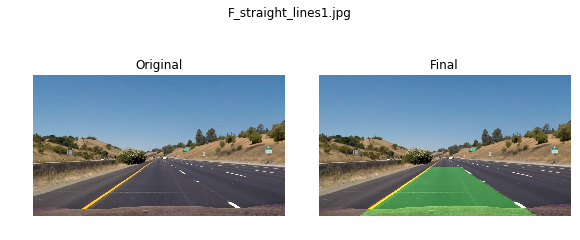

./test_images/test4.jpg F_test4.jpg ./output_images/F_test4.jpg


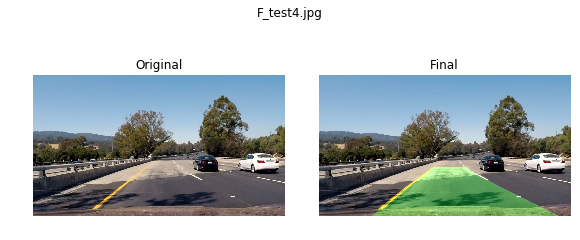

./test_images/test6.jpg F_test6.jpg ./output_images/F_test6.jpg


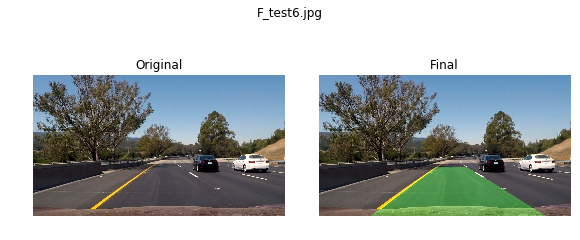

./test_images/test2.jpg F_test2.jpg ./output_images/F_test2.jpg


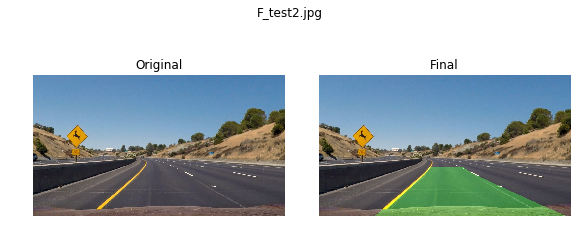

./test_images/test1.jpg F_test1.jpg ./output_images/F_test1.jpg


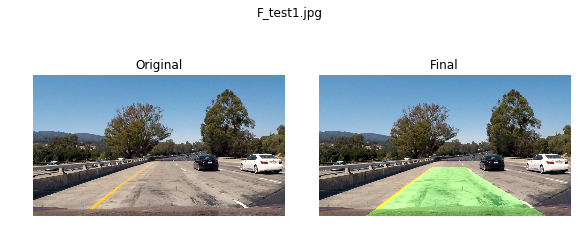

./test_images/test5.jpg F_test5.jpg ./output_images/F_test5.jpg


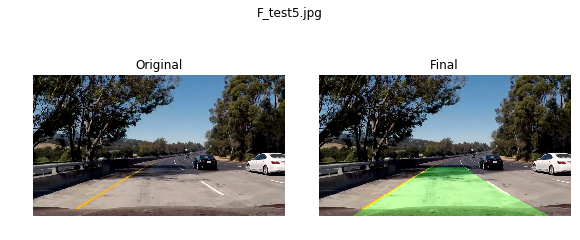

./test_images/straight_lines2.jpg F_straight_lines2.jpg ./output_images/F_straight_lines2.jpg


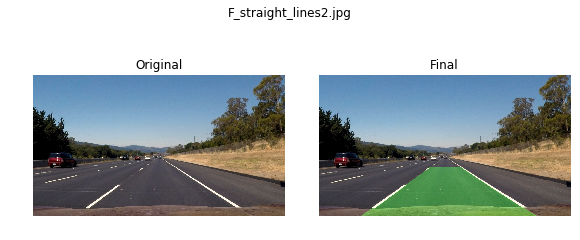

./test_images/test3.jpg F_test3.jpg ./output_images/F_test3.jpg


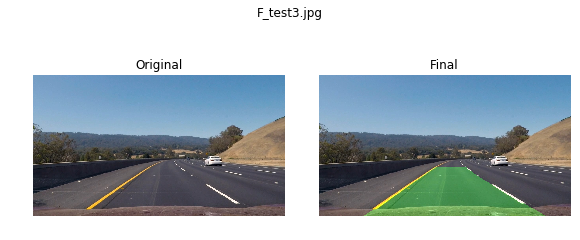

In [60]:
imgs = [ LaneFindingPipelineImageName(image_name, 1, 0, 0, 0, 0, 0, 0, 0, 1) for image_name in image_names ]

In [61]:
# Rubric 2-2: Pipeline: Code for single image with display of intermediate images

./test_images/test1.jpg U_test1.jpg ./output_images/full_pipeline/U_test1.jpg


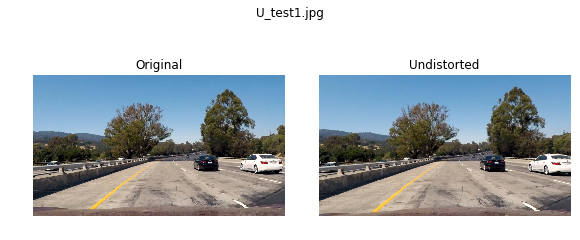

./test_images/test1.jpg H_test1.jpg ./output_images/full_pipeline/H_test1.jpg


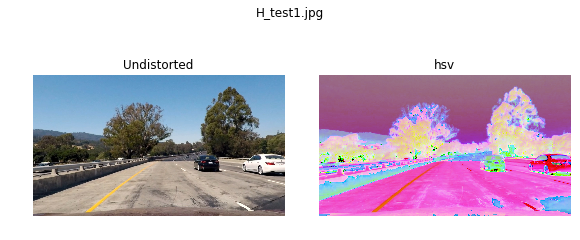

./test_images/test1.jpg B_test1.jpg ./output_images/full_pipeline/B_test1.jpg


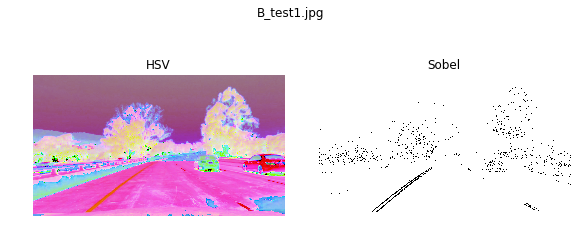

./test_images/test1.jpg W_test1.jpg ./output_images/full_pipeline/W_test1.jpg


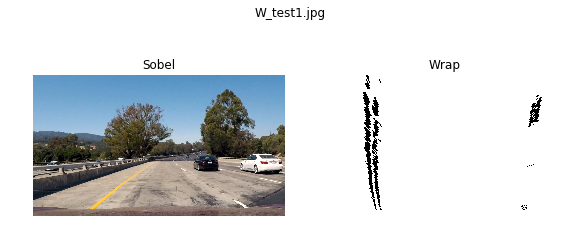

./test_images/test1.jpg test1_lines.jpg ./output_images/full_pipeline/test1_lines.jpg


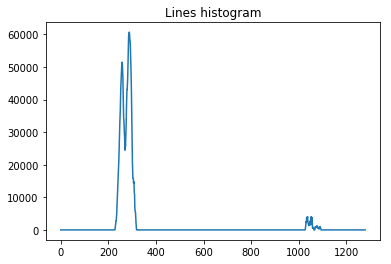

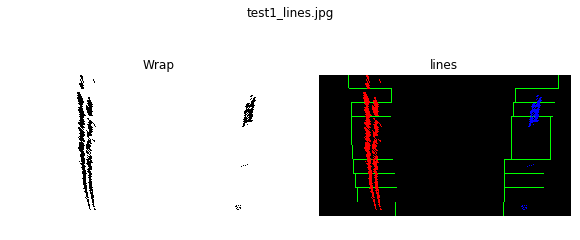

./test_images/test1.jpg F_test1.jpg ./output_images/full_pipeline/F_test1.jpg


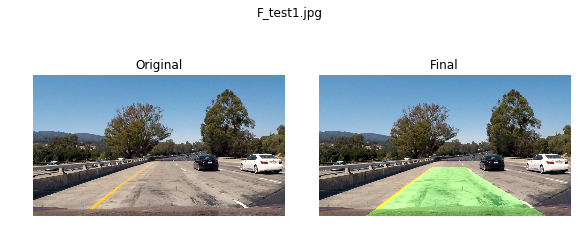

In [62]:
# Prepare for the pipeline and read images
indir = './test_images/'
outdir = './output_images/full_pipeline/';
file_suffix = "";
file_prefix = "";
image_name = indir+'test1.jpg'
LaneFindingPipelineImageName(image_name, 0, 0, 1, 1, 1, 1, 1, 1, 1)

In [63]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

./test_images/test3.jpg V_test3.jpg ./output_images/full_pipeline/V_test3.jpg


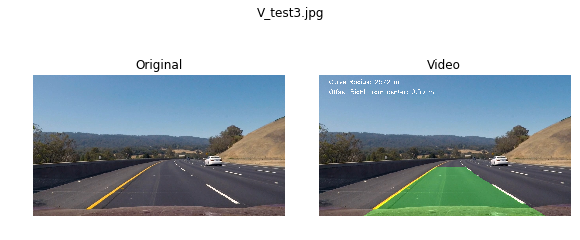

In [64]:
def process_image(image):
    # NOTE: The output you return should be a color image (3 channel) for processing video below
    # TODO: put your pipeline here,
    result = LaneFindingPipeline(image, image_name, 1, 0, 0, 0, 0, 0, 0, 0, 0)
    return result
indir = './test_images/'
outdir = './output_images/full_pipeline/';
file_suffix = "";
file_prefix = "";
image_name = indir+'test3.jpg'
(image_rgb_cv2, image_bgr_mtplt) = readImage(image_name);
img = image_bgr_mtplt
video_img = process_image(img)
display_save_2_images(1, [img, video_img], ['Original', 'Video'], image_name, "V_"+file_prefix, file_suffix, outdir)

In [65]:
project_video_output="./output_video/project_video.mp4"
if (os.path.exists('./output_video')):
    pass
else:
    os.mkdir('./output_video')
clip1 = VideoFileClip("./project_video.mp4")
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(project_video_output, audio=False)

[MoviePy] >>>> Building video ./output_video/project_video.mp4
[MoviePy] Writing video ./output_video/project_video.mp4


100%|█████████▉| 1260/1261 [03:45<00:00,  5.51it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: ./output_video/project_video.mp4 

CPU times: user 12min 45s, sys: 2min 25s, total: 15min 11s
Wall time: 3min 46s


In [66]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(project_video_output))